<a href="https://colab.research.google.com/github/narma2005/Recognizing-handwriting-digits-with-deep-learning-for-smarter-AI-application-/blob/main/Copy_of_Narmatha_M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8752 - loss: 0.4305 - val_accuracy: 0.9635 - val_loss: 0.1198
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9647 - loss: 0.1129 - val_accuracy: 0.9743 - val_loss: 0.0911
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9784 - loss: 0.0701 - val_accuracy: 0.9738 - val_loss: 0.0850
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9833 - loss: 0.0527 - val_accuracy: 0.9745 - val_loss: 0.0901
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9868 - loss: 0.0403 - val_accuracy: 0.9753 - val_loss: 0.0934
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9714 - loss: 0.0899
Test accuracy: 0.9761
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


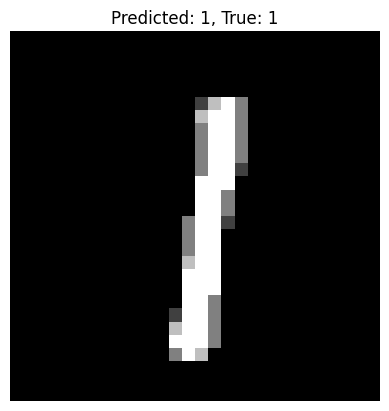

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize input data
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train_cat, epochs=5, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f'Test accuracy: {test_acc:.4f}')

# Predict and visualize a sample
import numpy as np
index = np.random.randint(0, len(x_test))
sample = x_test[index].reshape(1, 28, 28)
prediction = model.predict(sample)

plt.imshow(x_test[index], cmap='gray')
plt.title(f'Predicted: {np.argmax(prediction)}, True: {y_test[index]}')
plt.axis('off')
plt.show()